In [250]:
#The dataset contains housing price data from Boston, Massachusetts, USA; which contains information collected 
#by the U.S Census Service concerning housing in the area of Boston Mass. 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  
##need  %matplotlib inline to see plots inside jupyter notebook
import statistics
from scipy.stats import sem
table_csv_path = r"C:\Users\kippk\Documents\DataScience101_Docs\Project3_Data\Data_Only\housing_txt.csv"
df=pd.read_csv(table_csv_path, dtype={'FIPS':str})
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [253]:
#Conduct descriptive statistics for crime rates
mn = round(df["CRIM"].mean(),2)
std = round(df["CRIM"].std(),2)
print('Descriptive statistics for crime rate by town (per capita).')
print(str(mn) + " is the mean of the dataset.")
print(str(std) + " is the standard deviation.")

Descriptive statistics for crime rate by town (per capita).
3.61 is the mean of the dataset.
8.6 is the standard deviation.


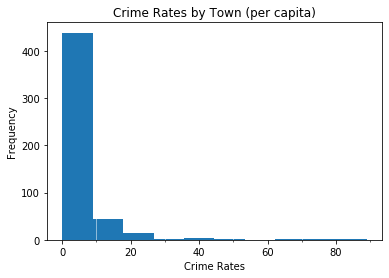

In [272]:
#Build histogram of selected variable
bins=plt.hist(df["CRIM"])
plt.title("Crime Rates by Town (per capita)")
plt.xlabel('Crime Rates')
plt.ylabel('Frequency')

# define minor ticks and draw a grid with them
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)


# Show plot
plt.show()

In [274]:
#Correlation Coefficient for MEDV and CRIM
x= df["CRIM"]
y = df["MEDV"] 0
corr = round(np.corrcoef(x, y)[0][1],2)
print(str(corr) + " is the correlation coefficient between home values and crime rates; resulting in a moderate negative association.")

-0.39 is the correlation coefficient between home values and crime rates; resulting in a moderate negative association.


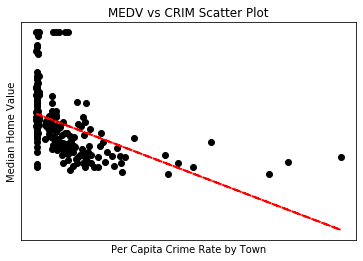

In [300]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
X = df['CRIM'] 
Y = df['MEDV']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

X_train = X[:-250]
X_test = X[-250:]

# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('MEDV vs CRIM Scatter Plot')
plt.ylabel('Median Home Value')
plt.xlabel('Per Capita Crime Rate by Town')
plt.xticks(())
plt.yticks(())

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)

plt.show()

Text(0, 0.5, 'Per Capita Crime Rate by Town')

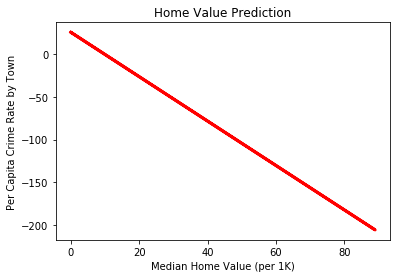

In [279]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.title('Home Value Prediction')
plt.xlabel('Median Home Value (per 1K)')
plt.ylabel('Per Capita Crime Rate by Town')